In [1]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np 
from scipy.signal import welch
from detect_peaks import detect_peaks

In [2]:
HomeDirectory = "/Users/tbryan/Desktop/9 2019 Fall/ECEN 403/Programming/Programs_October13"
os.chdir(HomeDirectory)
print(os.getcwd())

/Users/tbryan/Desktop/9 2019 Fall/ECEN 403/Programming/Programs_October13


In [3]:
os.chdir('Data')
os.chdir('IMS')
directory = os.listdir('1st_test')
os.chdir('1st_test')
print(directory[1])

2003.11.17.23.42.30


In [4]:
data = pd.read_table(directory[0],header = None)
data.columns = ['b1x','b1y','b2x','b2y','b3x','b3y','b4x','b4y']
print(data.head())

     b1x    b1y    b2x    b2y    b3x    b3y    b4x    b4y
0 -0.146 -0.073 -0.168 -0.120 -0.024 -0.022 -0.063 -0.193
1 -0.081 -0.110 -0.107 -0.173 -0.198 -0.151  0.002 -0.125
2 -0.110  0.000 -0.151 -0.234  0.034  0.127  0.034 -0.176
3 -0.269 -0.002 -0.144 -0.212  0.007 -0.051 -0.066 -0.122
4 -0.200 -0.103 -0.215 -0.227 -0.142  0.061 -0.103 -0.059


In [5]:
b1x = np.transpose(data.values[:,0])
b1y = np.transpose(data.values[:,1])
b2x = np.transpose(data.values[:,2])
b2y = np.transpose(data.values[:,3])
b3x = np.transpose(data.values[:,4])
b3y = np.transpose(data.values[:,5])
b4x = np.transpose(data.values[:,6])
b4y = np.transpose(data.values[:,7])
x = data.index.values
print(x)

[    0     1     2 ... 20477 20478 20479]


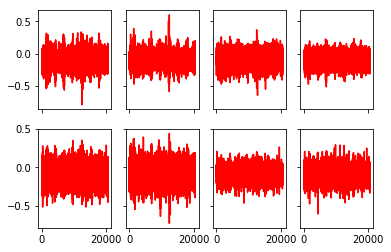

In [6]:
fig, ax = plt.subplots(2, 4, sharex ='col',sharey = 'row')

ax[0, 0].plot(x,b1x, 'r')       #row=0, col=0
ax[0, 1].plot(x,b1y, 'r')       #row=0, col=1
ax[0, 2].plot(x,b2x, 'r')       #row=0, col=2
ax[0, 3].plot(x,b2y, 'r')       #row=0, col=3
ax[1, 0].plot(x,b3x, 'r')       #row=1, col=0
ax[1, 1].plot(x,b3y, 'r')       #row=1, col=1
ax[1, 2].plot(x,b4x, 'r')       #row=1, col=2
ax[1, 3].plot(x,b4y, 'r')       #row=1, col=3

plt.show()


In [7]:
"""
n: Shaft rotational speed [Hz] 2000 rpm
N: No. of rolling elements [-] 16
Bd: Diameter of a rolling element [mm] 0.331 in
Pd: Pitch diameter [mm] 2.815 in
ϕ: Contact angle [rad] 15.17*pi/180
"""

n = 2000 / 60
N = 16
Bd = 0.331*254
Pd = 2.815*254
phi = 15.17 * np.pi / 180


In [8]:
xx = Bd/Pd*np.cos(phi)
BPFI = (N/2)*(1 + xx)*n

BPFO = (N/2)*(1 - xx)*n

BSF = (Pd/(2*Bd))*(1-(xx)**2)*n

FTF= (1/2)*(1 - xx)*n
print(BPFI,BPFO,BSF,FTF)

296.929862044058 236.40347128927536 139.91665578625418 14.77521695557971


In [9]:
BearingInfo = {
    "BPFI": BPFI,
    "BPFO": BPFO,
    "BSF":  BSF,
    "FTF":  FTF
}

In [10]:
#DC Offset Removal
b1x = b1x - np.mean(b1x)
b1y = b1y - np.mean(b1y)
b2x = b2x - np.mean(b2x)
b2y = b2y - np.mean(b2y)
b3x = b3x - np.mean(b3x)
b3y = b3y - np.mean(b3y)
b4x = b4x - np.mean(b4x)
b5y = b4y - np.mean(b4y)

In [11]:
def FourierTransform(comb_sig, T, N, f_s):
    #Fast Fourier Transform
    #number_of_time_samples = len(t)
    number_of_time_samples = N
    frq = np.arange(number_of_time_samples)/(Tmax)# two sides frequency range
    frq = frq[range(int(number_of_time_samples/(2)))] # one side frequency range
    Y = abs(np.fft.fft(comb_sig))/number_of_time_samples # fft computing and normalization
    Y = Y[range(int(number_of_time_samples/2))]
    #End fft
    x = {
        "Frequency":frq,
        "Freq. Amp.": Y
        }
    return x

In [12]:
SampleFrequency = 20000
#FrequencyResolution = 0.1
NumberOfSamples = len(data.index.values)
dt = 1/SampleFrequency
#Tmax = 1 / FrequencyResolution
Tmax = dt*NumberOfSamples
t = np.arange(0,Tmax,dt) #same as x*dt

In [13]:
b1xfft = FourierTransform(b1x,Tmax,NumberOfSamples,SampleFrequency)
b1yfft = FourierTransform(b1y,Tmax,NumberOfSamples,SampleFrequency)
b2xfft = FourierTransform(b2x,Tmax,NumberOfSamples,SampleFrequency)
b2yfft = FourierTransform(b2y,Tmax,NumberOfSamples,SampleFrequency)
b3xfft = FourierTransform(b3x,Tmax,NumberOfSamples,SampleFrequency)
b3yfft = FourierTransform(b3y,Tmax,NumberOfSamples,SampleFrequency)
b4xfft = FourierTransform(b4x,Tmax,NumberOfSamples,SampleFrequency)
b4yfft = FourierTransform(b4y,Tmax,NumberOfSamples,SampleFrequency)


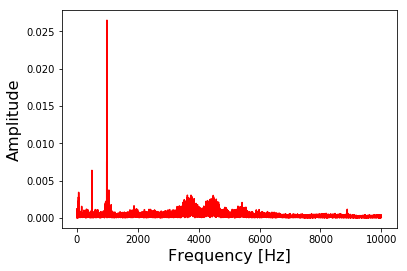

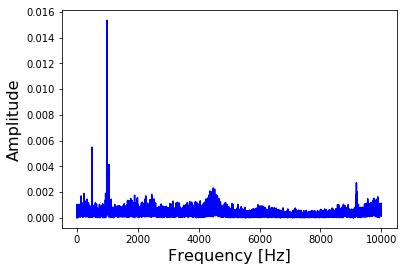

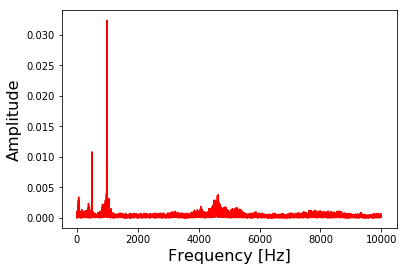

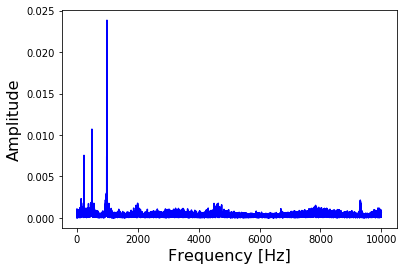

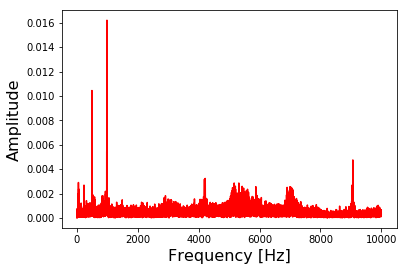

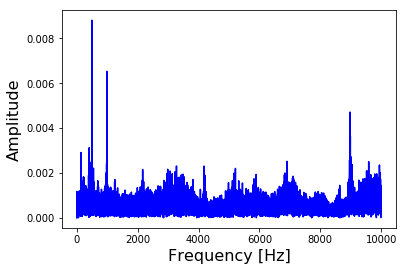

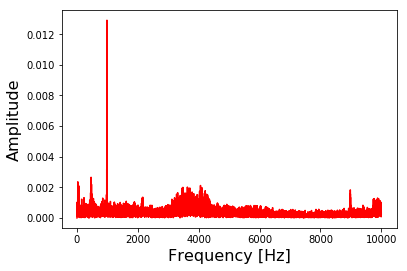

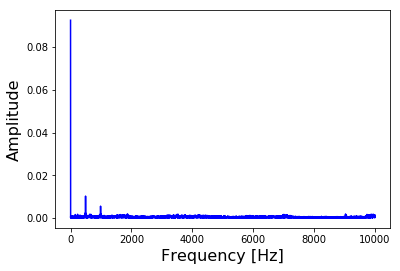

In [14]:
fig = plt.figure(1)
plt.plot(b1xfft['Frequency'],b1xfft['Freq. Amp.'], 'r')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
fig = plt.figure(2)
plt.plot(b1yfft['Frequency'],b1yfft['Freq. Amp.'], 'b')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
fig = plt.figure(3)
plt.plot(b2xfft['Frequency'],b2xfft['Freq. Amp.'], 'r')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
fig = plt.figure(4)
plt.plot(b2yfft['Frequency'],b2yfft['Freq. Amp.'], 'b')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
fig = plt.figure(5)
plt.plot(b3xfft['Frequency'],b3xfft['Freq. Amp.'], 'r')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
fig = plt.figure(6)
plt.plot(b3yfft['Frequency'],b3yfft['Freq. Amp.'], 'b')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
fig = plt.figure(7)
plt.plot(b4xfft['Frequency'],b4xfft['Freq. Amp.'], 'r')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
fig = plt.figure(8)
plt.plot(b4yfft['Frequency'],b4yfft['Freq. Amp.'], 'b')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)

plt.show()

In [15]:
def get_psd_values(comb_sig, T, N, fs):
    frq, psd_values = welch(comb_sig, fs=fs)
    x = {
        "Frequency":frq,
        "PSD": psd_values
        }
    return x

In [16]:
b1xPSD = get_psd_values(b1x,Tmax,NumberOfSamples,SampleFrequency)
b1yPSD = get_psd_values(b1y,Tmax,NumberOfSamples,SampleFrequency)
b2xPSD = get_psd_values(b2x,Tmax,NumberOfSamples,SampleFrequency)
b2yPSD = get_psd_values(b2y,Tmax,NumberOfSamples,SampleFrequency)
b3xPSD = get_psd_values(b3x,Tmax,NumberOfSamples,SampleFrequency)
b3yPSD = get_psd_values(b3y,Tmax,NumberOfSamples,SampleFrequency)
b4xPSD = get_psd_values(b4x,Tmax,NumberOfSamples,SampleFrequency)
b4yPSD = get_psd_values(b4y,Tmax,NumberOfSamples,SampleFrequency)



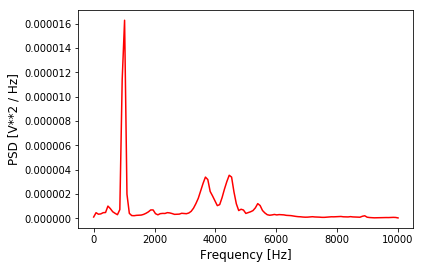

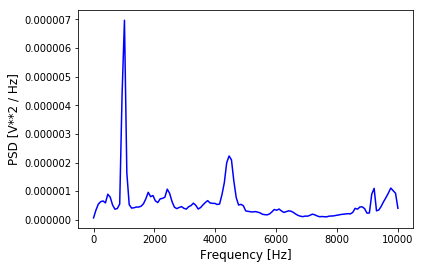

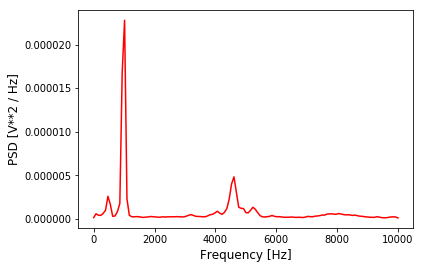

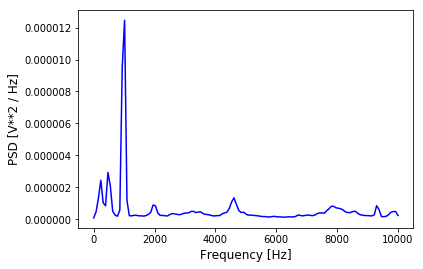

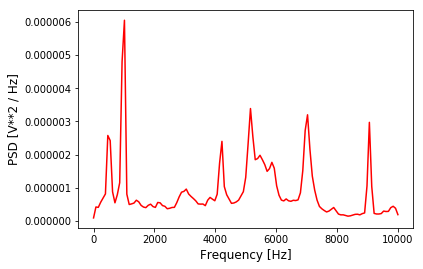

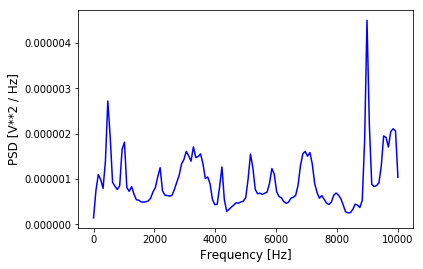

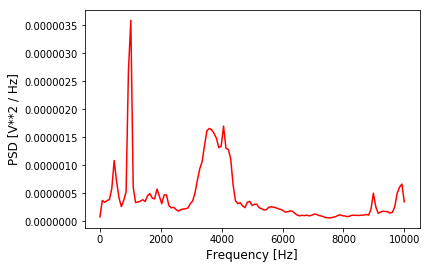

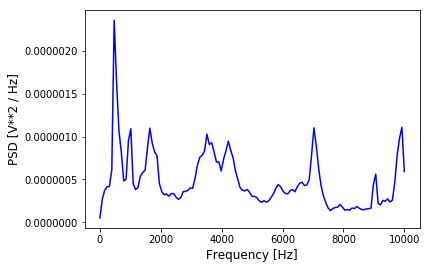

In [17]:
fig = plt.figure(1)
plt.plot(b1xPSD['Frequency'],b1xPSD['PSD'], 'r')
plt.xlabel('Frequency [Hz]', fontsize=12)
plt.ylabel('PSD [V**2 / Hz]', fontsize=12)
fig = plt.figure(2)
plt.plot(b1yPSD['Frequency'],b1yPSD['PSD'], 'b')
plt.xlabel('Frequency [Hz]', fontsize=12)
plt.ylabel('PSD [V**2 / Hz]', fontsize=12)
fig = plt.figure(3)
plt.plot(b2xPSD['Frequency'],b2xPSD['PSD'], 'r')
plt.xlabel('Frequency [Hz]', fontsize=12)
plt.ylabel('PSD [V**2 / Hz]', fontsize=12)
fig = plt.figure(4)
plt.plot(b2yPSD['Frequency'],b2yPSD['PSD'], 'b')
plt.xlabel('Frequency [Hz]', fontsize=12)
plt.ylabel('PSD [V**2 / Hz]', fontsize=12)
fig = plt.figure(5)
plt.plot(b3xPSD['Frequency'],b3xPSD['PSD'], 'r')
plt.xlabel('Frequency [Hz]', fontsize=12)
plt.ylabel('PSD [V**2 / Hz]', fontsize=12)
fig = plt.figure(6)
plt.plot(b3yPSD['Frequency'],b3yPSD['PSD'], 'b')
plt.xlabel('Frequency [Hz]', fontsize=12)
plt.ylabel('PSD [V**2 / Hz]', fontsize=12)
fig = plt.figure(7)
plt.plot(b4xPSD['Frequency'],b4xPSD['PSD'], 'r')
plt.xlabel('Frequency [Hz]', fontsize=12)
plt.ylabel('PSD [V**2 / Hz]', fontsize=12)
fig = plt.figure(8)
plt.plot(b4yPSD['Frequency'],b4yPSD['PSD'], 'b')
plt.xlabel('Frequency [Hz]', fontsize=12)
plt.ylabel('PSD [V**2 / Hz]', fontsize=12)

plt.show()

In [18]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]
 
def get_autocorr_values(comb_sig, T, N, f_s):
    autocorr_values = autocorr(comb_sig)
    x_values = np.array([T * jj for jj in range(0, N)])
    x = {
        "X Values":x_values,
        "Autocorr Values": autocorr_values
        }
    return x

In [19]:
b1xacv = get_autocorr_values(b1x, Tmax, NumberOfSamples, SampleFrequency)
b1yacv = get_autocorr_values(b1y, Tmax, NumberOfSamples, SampleFrequency)
b2xacv = get_autocorr_values(b2x, Tmax, NumberOfSamples, SampleFrequency)
b2yacv = get_autocorr_values(b2y, Tmax, NumberOfSamples, SampleFrequency)
b3xacv = get_autocorr_values(b3x, Tmax, NumberOfSamples, SampleFrequency)
b3yacv = get_autocorr_values(b3y, Tmax, NumberOfSamples, SampleFrequency)
b4xacv = get_autocorr_values(b4x, Tmax, NumberOfSamples, SampleFrequency)
b4yacv = get_autocorr_values(b4y, Tmax, NumberOfSamples, SampleFrequency)

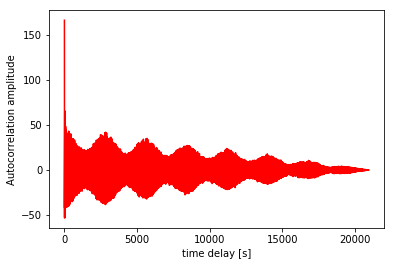

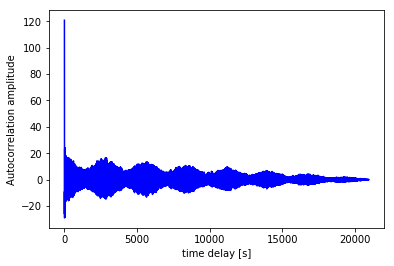

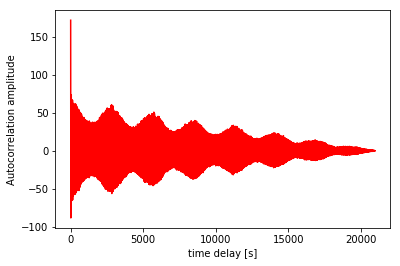

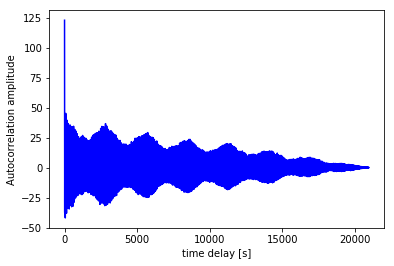

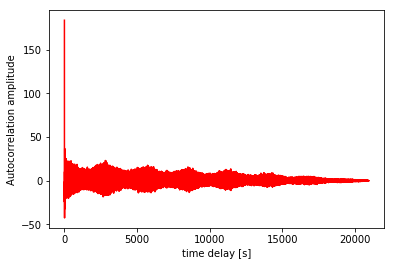

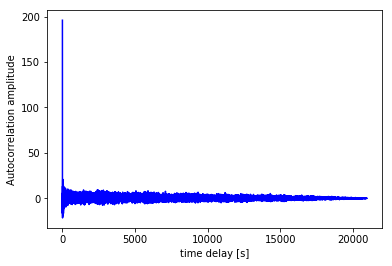

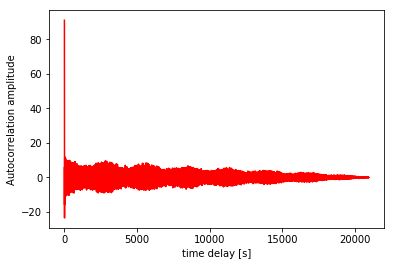

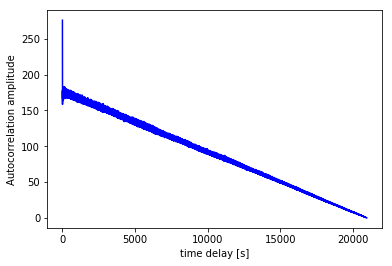

In [20]:
fig = plt.figure(1)
plt.plot(b1xacv['X Values'],b1xacv['Autocorr Values'], 'r')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')
fig = plt.figure(2)
plt.plot(b1yacv['X Values'],b1yacv['Autocorr Values'], 'b')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')
fig = plt.figure(3)
plt.plot(b2xacv['X Values'],b2xacv['Autocorr Values'], 'r')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')
fig = plt.figure(4)
plt.plot(b2yacv['X Values'],b2yacv['Autocorr Values'], 'b')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')
fig = plt.figure(5)
plt.plot(b3xacv['X Values'],b3xacv['Autocorr Values'], 'r')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')
fig = plt.figure(6)
plt.plot(b3yacv['X Values'],b3yacv['Autocorr Values'], 'b')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')
fig = plt.figure(7)
plt.plot(b4xacv['X Values'],b4xacv['Autocorr Values'], 'r')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')
fig = plt.figure(8)
plt.plot(b4yacv['X Values'],b4yacv['Autocorr Values'], 'b')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')

plt.show()

In [21]:
max_peak_height = 0.1 * np.nanmax(b1xfft['Freq. Amp.'])
threshold = 0.05 * np.nanmax(b1xfft['Freq. Amp.'])
peak = detect_peaks(b1xfft['Freq. Amp.'],edge = 'rising',mph = max_peak_height, mpd = 5, threshold = threshold )
print(len(peak))
print(peak)

11
[  51   59  505 1003 1010 1018 1076 3716 3838 3860 4585]


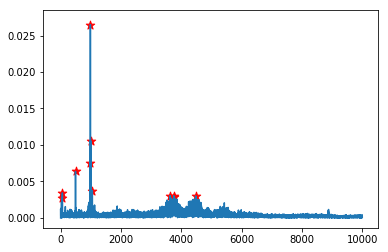

In [22]:
fig = plt.figure(1)
plt.plot(b1xfft['Frequency'],b1xfft['Freq. Amp.'])
for i in peak:
   plt.scatter(b1xfft['Frequency'][i],b1xfft['Freq. Amp.'][i], c= 'r', marker='*',s = 80)
plt.show()

In [23]:
m = []
mm = []
for i in peak:
    
    m.append(b1xfft['Freq. Amp.'][i]) 
    mm.append(b1xfft['Frequency'][i]) 

mmm = np.argsort(m)

n = []
nn = []
for i in mmm:
    n.append(m[i])
    nn.append(mm[i])


n  = n[::-1]   #Put array into descending order
nn = nn[::-1]   #Put array into descending order

[986.328125, 994.140625, 979.4921875, 493.1640625, 1050.78125, 57.6171875, 3628.90625, 3748.046875, 4477.5390625, 3769.53125, 49.8046875]
[0.026494323948110805, 0.010561456429464305, 0.007565782851105302, 0.0063746564567566544, 0.003736716662883631, 0.0034276695867978086, 0.003047658483596182, 0.003042057873200976, 0.003009078419662543, 0.0028925614855210167, 0.002798051555930734]


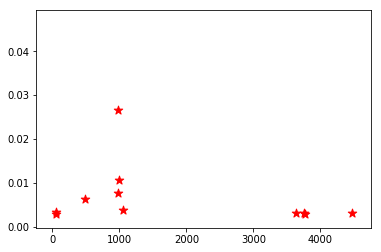

In [24]:
print(nn)
print(n)

i = 0
for m in n:
    plt.scatter(nn[i],n[i], c= 'r', marker='*',s = 80)
    i += 1
plt.show()


In [25]:
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.signal import hilbert

def TimeDomainInformation(comb_sig, T, N, f_s):
    x = {
        "RMS": np.mean(comb_sig**2),
        "Mean": np.mean(comb_sig),
        "Max": np.max(comb_sig),
        "Min": np.min(comb_sig),
        "Kurtosis": kurtosis(comb_sig),
        "Skew": skew(comb_sig)
    }

    return x

In [26]:
TimeDomainInfo = TimeDomainInformation(b1x,Tmax,NumberOfSamples,SampleFrequency)



In [27]:
def GetSortedPeak(frq,comb_sig, T, N, f_s):
    max_peak_height = 0.1 * np.nanmax(comb_sig)
    threshold = 0.05 * np.nanmax(comb_sig)
    #Get indices of peak
    peak = detect_peaks(comb_sig,edge = 'rising',mph = max_peak_height, mpd = 2, threshold = threshold )
    
    m = []
    mm = []
    for i in peak:
        m.append(comb_sig[i]) 
        mm.append(frq[i])

    mmm = np.argsort(m)
    n = []
    nn = []
    for i in mmm:
        n.append(m[i])
        nn.append(mm[i])

    n  = n[::-1]
    nn = nn[::-1]

    return n, nn
    

In [28]:
b1xfft = FourierTransform(b1x,Tmax,NumberOfSamples,SampleFrequency)
n,nn = GetSortedPeak(b1xfft['Frequency'],b1xfft['Freq. Amp.'],Tmax,NumberOfSamples,SampleFrequency)
print(n)
print(nn)


[0.026494323948110805, 0.010561456429464305, 0.007565782851105302, 0.0063746564567566544, 0.003736716662883631, 0.0034276695867978086, 0.003047658483596182, 0.003042057873200976, 0.003009078419662543, 0.0028925614855210167, 0.002798051555930734, 0.0027303845483246797]
[986.328125, 994.140625, 979.4921875, 493.1640625, 1050.78125, 57.6171875, 3628.90625, 3748.046875, 4477.5390625, 3769.53125, 49.8046875, 3632.8125]


In [29]:
def FrequencyDomainInformation(comb_sig, T, N, f_s):
    x1 = FourierTransform(comb_sig, T, N, f_s)
    x2 = get_psd_values(comb_sig, T, N, f_s)
    x3 = get_autocorr_values(comb_sig, T, N, f_s)
    FTamp,FTfreq = GetSortedPeak(x1['Frequency'],x1['Freq. Amp.'], T, N, f_s)
    PSDamp,PSDfreq = GetSortedPeak(x2['Frequency'],x2['PSD'], T, N, f_s)
    Cor,CorTime = GetSortedPeak(x3['X Values'],x3['Autocorr Values'], T, N, f_s)
    
    while len(FTamp) <= 5:
        FTamp.append([False])
    while len(FTfreq) <= 5:
        FTfreq.append([False])
    while len(PSDamp) <= 5:
        PSDamp.append([False])
    while len(PSDfreq) <= 5:
        PSDfreq.append([False])
    while len(Cor) <= 5:
        Cor.append([False])
    while len(CorTime) <= 5:
        CorTime.append([False])
    
    x = {
        "FFT Frq @ Peak 1": FTfreq[0],
        "FFT Frq @ Peak 2": FTfreq[1],
        "FFT Frq @ Peak 3": FTfreq[2],
        "FFT Frq @ Peak 4": FTfreq[3],
        "FFT Frq @ Peak 5": FTfreq[4],
        "FFT Amp @ Peak 1": FTamp[0],
        "FFT Amp @ Peak 2": FTamp[1],
        "FFT Amp @ Peak 3": FTamp[2],
        "FFT Amp @ Peak 4": FTamp[3],
        "FFT Amp @ Peak 5": FTamp[4],
        "PSD Frq @ Peak 1": PSDfreq[0],
        "PSD Frq @ Peak 2": PSDfreq[1],
        "PSD Frq @ Peak 3": PSDfreq[2],
        "PSD Frq @ Peak 4": PSDfreq[3],
        "PSD Frq @ Peak 5": PSDfreq[4],
        "PSD Amp @ Peak 1": PSDamp[0],
        "PSD Amp @ Peak 2": PSDamp[1],
        "PSD Amp @ Peak 3": PSDamp[2],
        "PSD Amp @ Peak 4": PSDamp[3],
        "PSD Amp @ Peak 5": PSDamp[4],
        "Autocorrelate Time @ Peak 1": CorTime[0],
        "Autocorrelate Time @ Peak 2": CorTime[1],
        "Autocorrelate Time @ Peak 3": CorTime[2],
        "Autocorrelate Time @ Peak 4": CorTime[3],
        "Autocorrelate Time @ Peak 5": CorTime[4],
        "Autocorrelate @ Peak 1": Cor[0],
        "Autocorrelate @ Peak 2": Cor[1],
        "Autocorrelate @ Peak 3": Cor[2],
        "Autocorrelate @ Peak 4": Cor[3],
        "Autocorrelate @ Peak 5": Cor[4]
    }
    return x   

In [30]:
FrequecyDomainInfo = FrequencyDomainInformation(b1x,Tmax,NumberOfSamples,SampleFrequency)
print(FrequecyDomainInfo)

{'FFT Frq @ Peak 1': 986.328125, 'FFT Frq @ Peak 2': 994.140625, 'FFT Frq @ Peak 3': 979.4921875, 'FFT Frq @ Peak 4': 493.1640625, 'FFT Frq @ Peak 5': 1050.78125, 'FFT Amp @ Peak 1': 0.026494323948110805, 'FFT Amp @ Peak 2': 0.010561456429464305, 'FFT Amp @ Peak 3': 0.007565782851105302, 'FFT Amp @ Peak 4': 0.0063746564567566544, 'FFT Amp @ Peak 5': 0.003736716662883631, 'PSD Frq @ Peak 1': 1015.625, 'PSD Frq @ Peak 2': [False], 'PSD Frq @ Peak 3': [False], 'PSD Frq @ Peak 4': [False], 'PSD Frq @ Peak 5': [False], 'PSD Amp @ Peak 1': 1.628157629544164e-05, 'PSD Amp @ Peak 2': [False], 'PSD Amp @ Peak 3': [False], 'PSD Amp @ Peak 4': [False], 'PSD Amp @ Peak 5': [False], 'Autocorrelate Time @ Peak 1': 22.528, 'Autocorrelate Time @ Peak 2': 18.432000000000002, 'Autocorrelate Time @ Peak 3': [False], 'Autocorrelate Time @ Peak 4': [False], 'Autocorrelate Time @ Peak 5': [False], 'Autocorrelate @ Peak 1': 65.66829319537104, 'Autocorrelate @ Peak 2': 47.45499148784086, 'Autocorrelate @ Peak

In [31]:
def StateInformation(comb_sig, T, N, f_s):
    x = {
        "State": "Good"
    }
    return x

In [32]:
def MotorInformation(comb_sig, T, N, f_s):
    x = {
        "Motor Type AC(1)-DC(0)": 1,
        "Shaft Speed [Hz]": 2000/60
    }
    return x

In [33]:
StateInfo = StateInformation(b1x,Tmax,NumberOfSamples,SampleFrequency)
MotorInfo = MotorInformation(b1x,Tmax,NumberOfSamples,SampleFrequency)

In [34]:
Features = {**StateInfo,**MotorInfo,**BearingInfo,**TimeDomainInfo,**FrequecyDomainInfo}
Features = pd.DataFrame(Features, index=[0])

print(Features)

  State  Motor Type AC(1)-DC(0)  Shaft Speed [Hz]        BPFI        BPFO  \
0  Good                       1         33.333333  296.929862  236.403471   

          BSF        FTF       RMS          Mean       Max  \
0  139.916656  14.775217  0.008119  1.027824e-17  0.429092   

            ...            Autocorrelate Time @ Peak 1  \
0           ...                                 22.528   

   Autocorrelate Time @ Peak 2  Autocorrelate Time @ Peak 3  \
0                       18.432                        False   

   Autocorrelate Time @ Peak 4  Autocorrelate Time @ Peak 5  \
0                        False                        False   

   Autocorrelate @ Peak 1  Autocorrelate @ Peak 2  Autocorrelate @ Peak 3  \
0               65.668293               47.454991                   False   

   Autocorrelate @ Peak 4  Autocorrelate @ Peak 5  
0                   False                   False  

[1 rows x 43 columns]


In [35]:
os.chdir(HomeDirectory)

In [36]:
x = [10, 11]
while len(x) <= 5:
    x.append([])
    
print(x)

[10, 11, [], [], [], []]
